In [1]:
pip install matplotlib pandas numpy tensorflow


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

2024-12-01 21:09:01.375845: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 21:09:05.288650: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 21:09:05.297690: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-01 21:09:15.081559: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Tensorflow version: 2.13.1
GPU detected: []


In [3]:
data = pd.read_csv("/home/mayank/Desktop/mayank/Programs/NER_Final_Projject/ner_dataset.csv", encoding="latin1")
data = data.fillna(method="ffill")
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [4]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35171
Unique tags in corpus: 17


In [5]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)

In [6]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)

In [7]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [8]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [9]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [10]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [11]:
word2idx

{'outbreaks': 1,
 'Yanukovych': 2,
 'sabotage': 3,
 'Wired.com': 4,
 'starving': 5,
 'Abyei': 6,
 'winning': 7,
 'Matteo': 8,
 'Gali': 9,
 'bylaw': 10,
 'compensating': 11,
 'captors': 12,
 'signaling': 13,
 'government-controlled': 14,
 'readying': 15,
 'Pro-business': 16,
 'hair': 17,
 'Magloire': 18,
 'Willy': 19,
 'Zhu': 20,
 '1419': 21,
 'shaking': 22,
 'astute': 23,
 'animal': 24,
 'tottering': 25,
 'supervision': 26,
 'Edison': 27,
 'harass': 28,
 'Spindleruv': 29,
 'high-risk': 30,
 'ferry': 31,
 'longevity': 32,
 'kerosene': 33,
 'soybeans': 34,
 '92': 35,
 'renounces': 36,
 'Mathieu': 37,
 'unverifiable': 38,
 'Bengalis': 39,
 'Bucca': 40,
 'reinvigorate': 41,
 'Ahronoth': 42,
 "al-Qa'ida": 43,
 'Kowalski': 44,
 'Loving': 45,
 'Nuclear': 46,
 'Nouakchott': 47,
 'crossroads': 48,
 'notes': 49,
 'companion': 50,
 'aggressive': 51,
 'thawing': 52,
 'holders': 53,
 'nine-millimeter': 54,
 'bargaining': 55,
 'Emile': 56,
 'Dwyer': 57,
 'Valley': 58,
 'kwaito': 59,
 'prior': 60,
 '

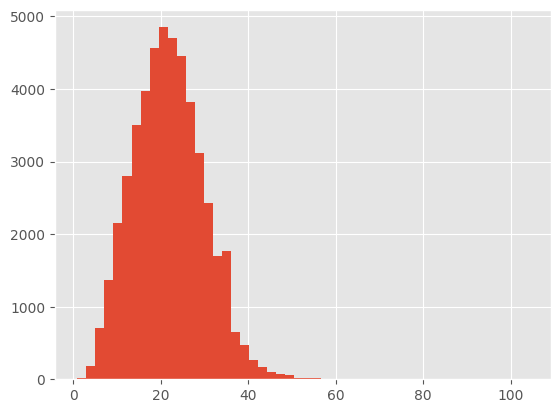

In [12]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

Updation for graph...

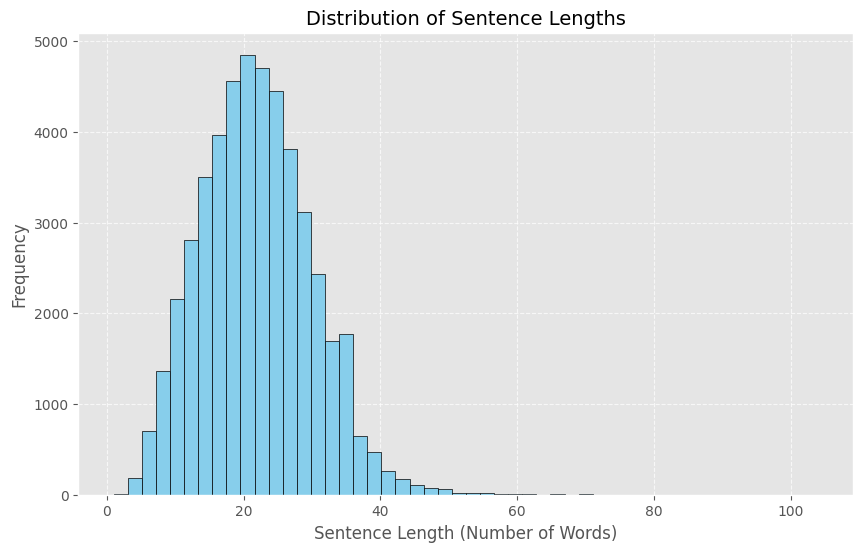

In [13]:
import matplotlib.pyplot as plt

# Create a list of sentence lengths
sentence_lengths = [len(s) for s in sentences]

# Create a histogram with customized parameters
plt.figure(figsize=(10, 6))  # Set the figure size for better clarity
plt.hist(sentence_lengths, bins=50, color='skyblue', edgecolor='black')  # Customize color and edges

# Adding title and labels to the plot for better understanding
plt.title("Distribution of Sentence Lengths", fontsize=14)  # Title of the plot
plt.xlabel("Sentence Length (Number of Words)", fontsize=12)  # Label for the X-axis
plt.ylabel("Frequency", fontsize=12)  # Label for the Y-axis

# Display grid for better readability of the plot
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [15]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [18]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758600   
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 50)            0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 50, 200)           120800    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 50, 17)            3417      
 ributed)                                                        
                                                             

In [19]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [20]:
!pip install livelossplot


In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

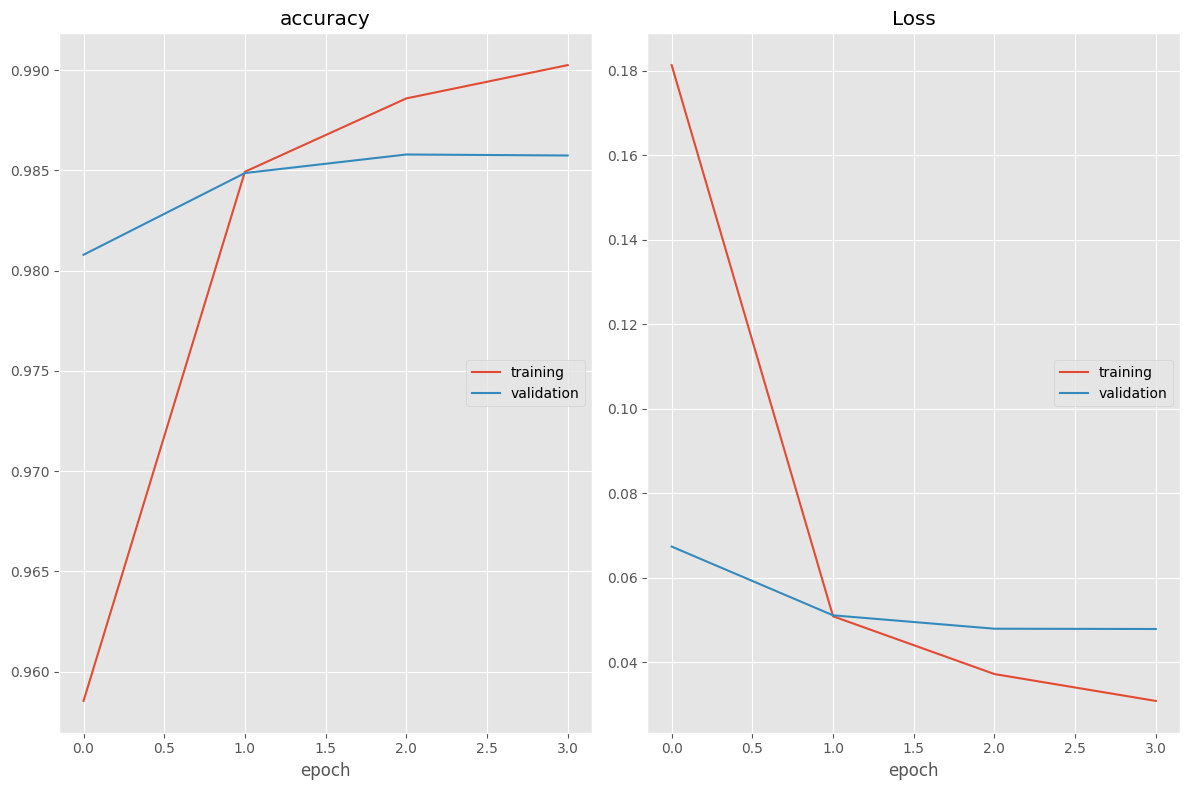

accuracy
	training         	 (min:    0.959, max:    0.990, cur:    0.990)
	validation       	 (min:    0.981, max:    0.986, cur:    0.986)
Loss
	training         	 (min:    0.031, max:    0.181, cur:    0.031)
	validation       	 (min:    0.048, max:    0.067, cur:    0.048)

Epoch 4: val_loss improved from 0.04791 to 0.04784, saving model to model_weights.weights.h5
1199/1199 [==============================] - 374s 312ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0478 - val_accuracy: 0.9857
CPU times: user 1h 3min 45s, sys: 1min 40s, total: 1h 5min 26s
Wall time: 25min 37s


In [22]:
%%time

chkpt = ModelCheckpoint("model_weights.weights.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    batch_size=32,
    epochs=9,
    callbacks=callbacks,
    verbose=1
)

In [23]:
model.evaluate(x_test, y_test)

300/300 [==============================] - 19s 64ms/step - loss: 0.0478 - accuracy: 0.9857


[0.04783729091286659, 0.9857443571090698]

In [24]:
results = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")


300/300 [==============================] - 20s 67ms/step - loss: 0.0478 - accuracy: 0.9857
Test Loss: 0.04783729091286659
Test Accuracy: 0.9857443571090698


In [25]:
i = np.random.randint(0, x_test.shape[0]) #659
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 1s 1s/step
Word           True 	 Pred

------------------------------
The            O	O
United         B-geo	B-geo
States         I-geo	I-geo
has            O	O
103            O	O
nuclear        O	O
power          O	O
plants         O	O
in             O	O
31             O	B-tim
states         O	O
.              O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O	O
undersecretary O

In [26]:
def predict_sentence(input_sentence):
    """
    Predicts the NER tags for a given input sentence using the trained model.
    """
    # Tokenize the input sentence into words
    input_words = input_sentence.split()

    # Use a safe fallback index (e.g., 0) for unknown words and padding
    unknown_index = 0  # Choose an index within the embedding range
    padding_index = 0  # Ensure this matches the embedding layer setup

    # Convert words to indices using word2idx
    input_indices = [word2idx.get(word, unknown_index) for word in input_words]

    # Pad the sequence to match the model's input length
    input_indices_padded = pad_sequences(
        sequences=[input_indices], maxlen=max_len, padding="post", value=padding_index
    )

    # Make predictions
    predictions = model.predict(np.array(input_indices_padded))
    predictions = np.argmax(predictions, axis=-1)[0]  # Get predicted tag indices

    # Map predicted indices back to tag names
    predicted_tags = [tags[pred] for pred in predictions[:len(input_words)]]

    # Print word and corresponding predicted tag
    print("{:15}{:5}".format("Word", "Predicted Tag"))
    print("-" * 30)
    for word, tag in zip(input_words, predicted_tags):
        print("{:15}{}".format(word, tag))


# Example usage
input_sentence = "Barack Obama was born in Hawaii."
predict_sentence(input_sentence)


1/1 [==============================] - 0s 93ms/step
Word           Predicted Tag
------------------------------
Barack         B-per
Obama          I-per
was            O
born           O
in             O
Hawaii.        O


In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, Dense, SpatialDropout1D, TimeDistributed, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define constants
max_len = 50
input_dim = num_words
output_dim = 50  # embedding dimension
num_tags = len(tag2idx)  # number of unique tags

# CNN Model
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Conv1D(filters=128, kernel_size=3, activation="relu", padding="same")(model)
model = TimeDistributed(Dense(num_tags, activation="softmax"))(model)

# Compile model
cnn_model = Model(input_word, model)
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])


cnn_model.summary()

# Define callbacks
cnn_chkpt = ModelCheckpoint("cnn_model_weights.h5", monitor="val_loss", verbose=1, save_best_only=True, mode="min")
cnn_early_stopping = EarlyStopping(monitor="val_loss", patience=3, verbose=1)

# Train CNN model
cnn_history = cnn_model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=7,
    callbacks=[cnn_chkpt, cnn_early_stopping]
)

# Evaluate the CNN model
cnn_eval = cnn_model.evaluate(x_test, y_test)
print(f"CNN Model Test Accuracy: {cnn_eval[1]}")


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 50)            1758600   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 50, 50)            0         
 alDropout1D)                                                    
                                                                 
 conv1d (Conv1D)             (None, 50, 128)           19328     
                                                                 
 time_distributed_1 (TimeDi  (None, 50, 17)            2193      
 stributed)                                                      
                                                                 
Total params: 1780121 (6.79 MB)
Trainable params: 1780121 (

/home/mayank/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1199/1199 [==============================] - 98s 80ms/step - loss: 0.1746 - accuracy: 0.9678 - val_loss: 0.0543 - val_accuracy: 0.9839
Epoch 2/7
1199/1199 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9869
Epoch 2: val_loss improved from 0.05429 to 0.05008, saving model to cnn_model_weights.h5
1199/1199 [==============================] - 93s 77ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 0.0501 - val_accuracy: 0.9848
Epoch 3/7
1199/1199 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9891
Epoch 3: val_loss did not improve from 0.05008
1199/1199 [==============================] - 96s 80ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0506 - val_accuracy: 0.9849
Epoch 4/7
1199/1199 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9900
Epoch 4: val_loss did not improve from 0.05008
1199/1199 [==============================] - 94s 79ms/step - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.0513 - val_acc

In [28]:
def predict_sentence(sentence, model, word2idx, idx2tag, max_len):
    # Tokenize the input sentence
    tokens = sentence.split()
    sequence = [word2idx.get(word, word2idx["ENDPAD"] - 1) for word in tokens]  # Use valid index for unknown words

    # Pad the sequence
    padded_sequence = pad_sequences(
        [sequence], maxlen=max_len, padding="post", value=word2idx["ENDPAD"] - 1
    )

    # Predict tags
    predictions = model.predict(padded_sequence)
    predictions = np.argmax(predictions, axis=-1)  # Get the index of the maximum probability

    # Map indices to tags
    predicted_tags = [idx2tag[idx] for idx in predictions[0]]

    # Print results
    print("{:15}{:5}\t{}".format("Word", "Pred", ""))
    print("-" * 30)
    for word, tag in zip(tokens, predicted_tags[:len(tokens)]):
        print("{:15}{}".format(word, tag))

# Ensure word2idx and idx2tag are consistent
word2idx["ENDPAD"] = len(word2idx)  # Assign a valid index to ENDPAD

# Create idx2tag for reverse lookup
idx2tag = {i: t for t, i in tag2idx.items()}

# Example sentence
sentence = "Barack Obama was born in Hawaii"
predict_sentence(sentence, cnn_model, word2idx, idx2tag, max_len)


1/1 [==============================] - 0s 417ms/step
Word           Pred 	
------------------------------
Barack         B-per
Obama          I-per
was            O
born           O
in             O
Hawaii         B-geo


In [35]:
cnn_model.save("cnn_model_weights.h5")  # Save the model as a .h5 file


/home/mayank/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model("cnn_model_weights.h5")

# Display the model summary to confirm it loaded correctly
loaded_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 50)            1758600   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 50, 50)            0         
 alDropout1D)                                                    
                                                                 
 conv1d (Conv1D)             (None, 50, 128)           19328     
                                                                 
 time_distributed_1 (TimeDi  (None, 50, 17)            2193      
 stributed)                                                      
                                                                 
Total params: 1780121 (6.79 MB)
Trainable params: 1780121 (